In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import utils
%matplotlib inline

plt.rcParams.update({'figure.max_open_warning': 0})

In [2]:
data = pd.read_csv('mushrooms.csv')
data.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


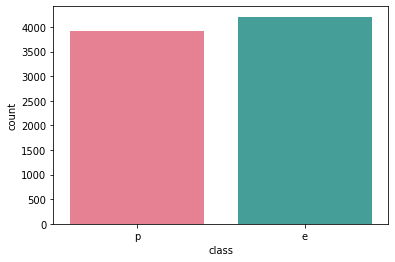

In [3]:
x = data['class']

ax = sns.countplot(x=x, data=data,palette='husl')

## Cap Characteristics

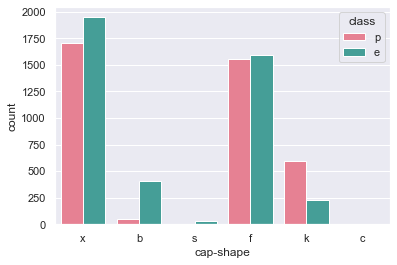

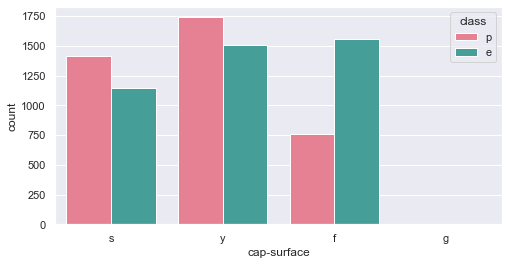

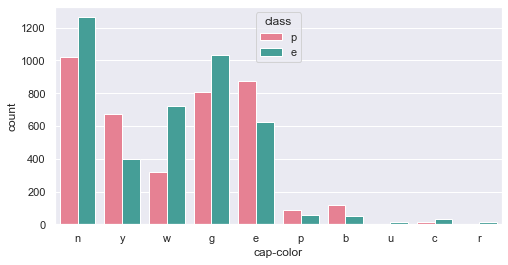

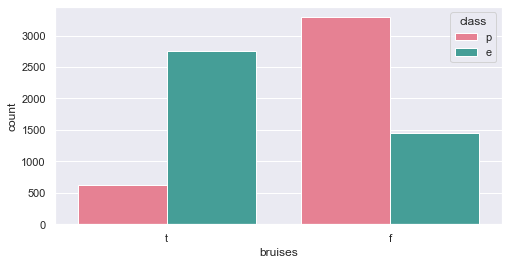

In [4]:
hue = data['class']
data_for_plot = data[["cap-shape","cap-surface" ,"cap-color","bruises"]]

utils.data_plot(hue, data_for_plot)

It looks like bruising on the cap can indicate that the mushroom is poisonous but not completely. Let's keep look at the other characteristics

## Gill Characteristics

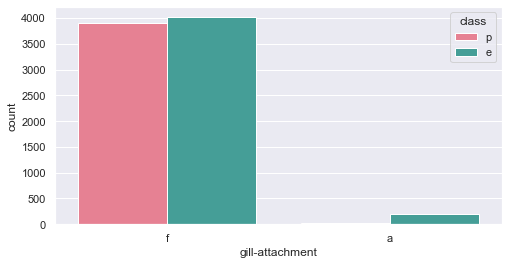

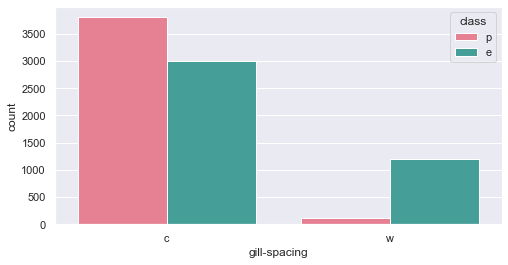

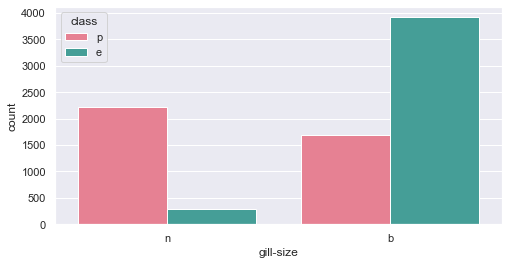

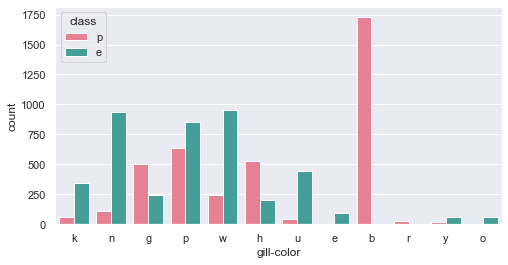

In [5]:
hue = data['class']
data_for_plot = data[["gill-attachment","gill-spacing" ,"gill-size","gill-color"]]

utils.data_plot(hue, data_for_plot)

What stands out immediately is that brown gill colors in a mushroom is often poisonous! But outside of that observation, it's hard to determine if a mushroom is poisonous or edible because they share similar characteristics for gill size, spacing, and attachment.

It's unfortunate that we also don't have a gill shape: Not all mushrooms have the same shape of gills & that is often used to denote if a mushroom is poisonous! 

## Stalk Characteristics

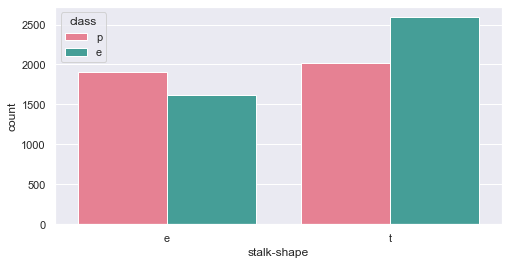

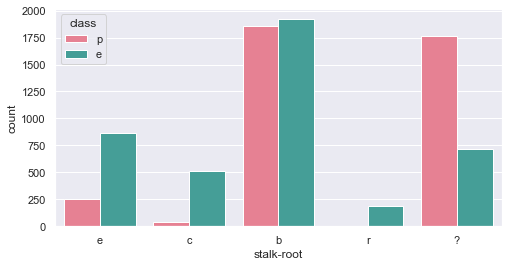

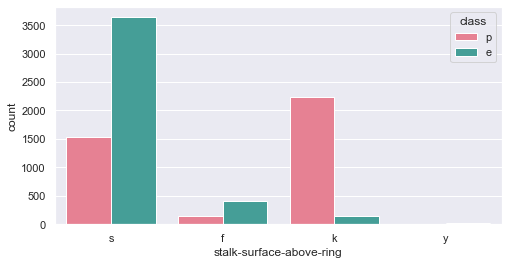

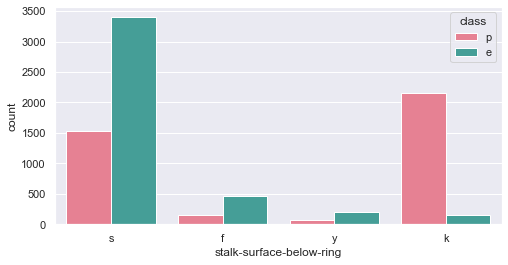

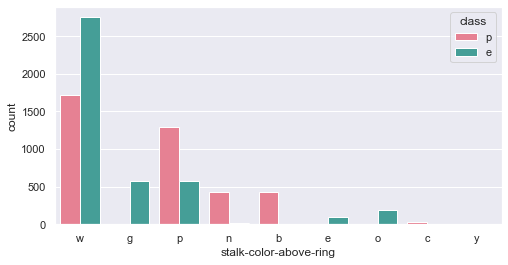

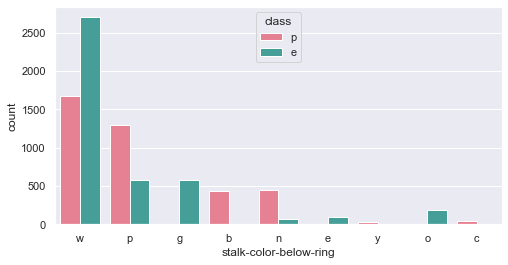

In [6]:
hue = data['class']
data_for_plot = data[["stalk-shape","stalk-root" ,"stalk-surface-above-ring","stalk-surface-below-ring","stalk-color-above-ring","stalk-color-below-ring"]]

utils.data_plot(hue, data_for_plot)

A silky stalk surface above & below the ring is a likely indicator that a mushroom is poisonous but there isn't a ton of striking features related to stalk color, root or shape that would give an indication that the mushroom is poisonous or edible.  

## Veil & Ring Characteristics

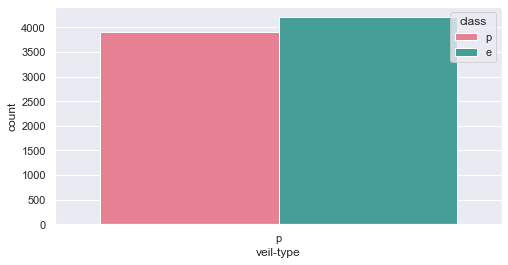

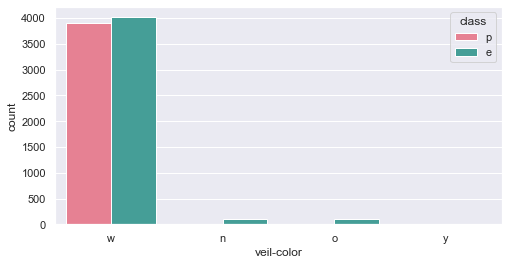

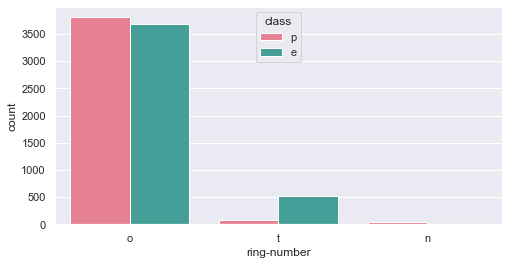

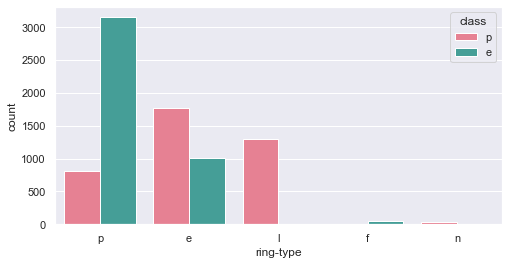

In [7]:
hue = data['class']
data_for_plot = data[["veil-type","veil-color" ,"ring-number","ring-type"]]

utils.data_plot(hue, data_for_plot)

Interesting. With our data on mushrooms, it doesn't look like the ring or veil makes much of a difference. 

In [8]:
#Checking for missing values

for col in data.columns:
    print("{} : {}".format(col,data[col].isnull().sum()))

class : 0
cap-shape : 0
cap-surface : 0
cap-color : 0
bruises : 0
odor : 0
gill-attachment : 0
gill-spacing : 0
gill-size : 0
gill-color : 0
stalk-shape : 0
stalk-root : 0
stalk-surface-above-ring : 0
stalk-surface-below-ring : 0
stalk-color-above-ring : 0
stalk-color-below-ring : 0
veil-type : 0
veil-color : 0
ring-number : 0
ring-type : 0
spore-print-color : 0
population : 0
habitat : 0


In [ ]:
# Replacing some str datas to int
data['class'] = data['class'].replace("e",0).replace("p",1)

In [ ]:
X=data.drop('class',axis=1) #Predictors
y=data['class'] #Response


In [ ]:
from sklearn.preprocessing import LabelEncoder
Encoder_X = LabelEncoder() 
for col in X.columns:
    X[col] = Encoder_X.fit_transform(X[col])
Encoder_y=LabelEncoder()
y = Encoder_y.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Applying PCA with  n_components = 2

In order to better visualize how our features can effectively predict our labels (poison or edible) on a 2D plane, let's convert our features using principal component analysis into principal components 1 & 2. Note that the axis are ranked in order of importance; differences along PC 1 are more important than differences along the second principal component.

It's important to also note that

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Logistic Regression Model
## Fitting Logistic Regression model to the Training set

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

classifier.fit(X_train,y_train)

## Logistic Regression Test Results

In [ ]:
utils.print_score(classifier,X_test,y_test)

## Visualising the Logistic Regression Test set results

In [ ]:
utils.model_visualization('Logistic Regression Test', X_test, y_test,classifier)

# K Nearest Neighbors (K-NN) Classification Model
## Fitting K-NN to the Training set

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNN

classifier = KNN()
classifier.fit(X_train,y_train)

## K-NN Test Results

In [ ]:
utils.print_score(classifier,X_test,y_test)

## Visualising the k-NN Test set results

In [ ]:
utils.model_visualization('k-Nearest Neighbors Classification Test', X_test, y_test,classifier)

# Decision Tree Classification Model
## Fitting Decision Tree classifier to the Training set

In [ ]:
from sklearn.tree import DecisionTreeClassifier as DT

classifier = DT(criterion='entropy',random_state=42)
classifier.fit(X_train,y_train)

## Decision Tree Test Results

In [ ]:
utils.print_score(classifier,X_test,y_test)

In [ ]:
utils.model_visualization('Decision Trees Test', X_test, y_test,classifier)